# 实验1 线性模型

 一、实验目的

掌握线性回归、对数几率回归和线性判别分析的原理与应用，熟悉Scikit-learn中算法的使用。  

### 二、实验内容

####  1.线性回归 

#### （1）随机线性数据的最小二乘回归  
  参考教材3.2节，线性模型$f\left(\boldsymbol x\right) = \boldsymbol w^T + b$ 参数的最优解为
 
  $$\hat{\boldsymbol w}^* = \left(X^TX\right)^{-1}X^T\boldsymbol y$$ 
      
利用随机生成的线性数据来学习模型并进行验证。

![](https://ai-studio-static-online.cdn.bcebos.com/3a0847372cc7433c8917bccd718e40ed2bed08f278e44a30b9372212fef41069)

1）生成数据：

In [4]:
#随机线性数据的最小二乘回归
import matplotlib.pyplot as plt
import numpy as np
X= 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

2）模型学习

In [4]:
Xb = np.c_[np.ones((100,1)), X]
w_best = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)

3） 预测

In [6]:
Xnew = np.array([[0],[2]])
Xnewb = np.c_[np.ones((2,1)), Xnew]
y_predict = Xnewb.dot(w_best)

plt.plot(Xnew,y_predict,"r-")
plt.plot(X,y,"b.")
#plt.axis([0,2,0,15])
plt.show

#### （2）使用Scikit-Learn 实现

阅读Scikit-learn手册中最小二乘线性回归的用法（https://scikit-learn.org/0.20/modules/linear_model.html#ordinary-least-squares）。

参考代码：

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)
#......

使用LinearRegression类来实现（1）中回归任务。

[[ 4.55355347]
 [10.45396195]]


<function matplotlib.pyplot.show>

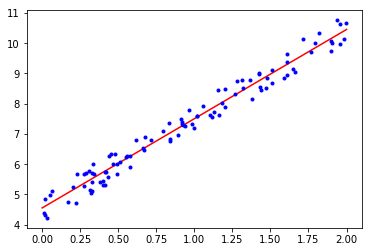

In [3]:
#使用LinearRegression的随机数据回归
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
X= 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
reg = linear_model.LinearRegression()
reg.fit(X,y)

Xnew = np.array([[0],[2]])
Xnewb = np.c_[np.ones((2,1)), Xnew]
y_predict = reg.predict(Xnew)

print(y_predict)
plt.plot(Xnew,y_predict,"r-")
plt.plot(X,y,"b.")
#plt.axis([0,2,0,15])
plt.show

#### （3）多元线性回归

参考Scikit-learn手册中最小二乘线性回归的例程，并进行修改，实现对Diabetes dataset数据的多元线性回归。

Data Set Characteristics:

![](https://ai-studio-static-online.cdn.bcebos.com/6530306ebf524389b4e30c67825475e51548099622854d2b8087669caf900a70)

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).


In [ ]:
#Load and extract data
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

常用评估回归拟合效果的指标：

* 均方误差（Mean Squared Error）：测试数据集中所有样本点的预测误差的平方的均值；

![](https://ai-studio-static-online.cdn.bcebos.com/834c6c5a2ab04333a3b26686c72b28dae3e9a3a1821640e3833894f091b82a62)

* R方得分（R2 Score）：确定性相关系数，用于衡量

![](https://ai-studio-static-online.cdn.bcebos.com/fa58070fad8f4dd2bb8088ec04f9f5532e5c421ac5744888985ead72cc907d35)

#### 实验与讨论
* 选择特征数据中不同属性组合作为样本特征值，比较回归性能并分析原因（比较至少三组）。
* 选择不同训练样本集和测试样本集的划分，比较回归性能（比较至少三组）。

In [2]:
#考虑到第一题最好是使用较好的划分比例这样得出的结果会好一些，所以先做第二题
#讨论第二题：不同划分比例得出的回归性能.三组数据全部使用所有特征值
import numpy as np
from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
#划分比例1——test：train = 1：10
Xtrain = diabetes_X[:-40]
Xtest = diabetes_X[-40:]
ytrain = diabetes_y[:-40]
ytest = diabetes_y[-40:]
reg1 = linear_model.LinearRegression()
reg1.fit(Xtrain, ytrain)
ans = reg1.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为10：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
#划分比例2——test：train = 1：5
Xtrain = diabetes_X[:-80]
Xtest = diabetes_X[-80:]
ytrain = diabetes_y[:-80]
ytest = diabetes_y[-80:]
reg2 = linear_model.LinearRegression()
reg2.fit(Xtrain, ytrain)
ans = reg2.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为5：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
#划分比例3——test：train = 1：50
Xtrain = diabetes_X[:-8]
Xtest = diabetes_X[-8:]
ytrain = diabetes_y[:-8]
ytest = diabetes_y[-8:]
reg3 = linear_model.LinearRegression()
reg3.fit(Xtrain, ytrain)
ans = reg3.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为50：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))

当比例约为10：1时，均方误差为1751.06，R方为0.9923
当比例约为5：1时，均方误差为2666.92，R方为0.9945
当比例约为50：1时，均方误差为1328.31，R方为0.9552


根据实验二，我们以R方来衡量误差的话，会发现50：1的答案最佳，但由于比例差太多，害怕出现过拟合的问题，所以在实验一我取10：1进行计算。

In [65]:
#实验一：取不同特征值比较其性能
import numpy as np
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
#划分比例1——test：train = 1：10
Xtrain = diabetes_X[:-40]
Xtest = diabetes_X[-40:]
ytrain = diabetes_y[:-40]
ytest = diabetes_y[-40:]
Xtr = np.c_[Xtrain[:,0],Xtrain[:,1],Xtrain[:,2]]
Xte = np.c_[Xtest[:,0],Xtest[:,1],Xtest[:,2]]
reg1 = linear_model.LinearRegression()
reg1.fit(Xtr, ytrain)
ans = reg1.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取前三个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
Xtr = np.c_[Xtrain[:,6],Xtrain[:,7],Xtrain[:,8]]
Xte = np.c_[Xtest[:,6],Xtest[:,7],Xtest[:,8]]
reg2 = linear_model.LinearRegression()
reg2.fit(Xtr, ytrain)
ans = reg2.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取第4、5、6个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
Xtr = np.c_[Xtrain[:,0],Xtrain[:,1],Xtrain[:,2]]
Xte = np.c_[Xtest[:,0],Xtest[:,1],Xtest[:,2]]
reg = linear_model.LinearRegression()
reg.fit(Xtr, ytrain)
ans = reg.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取第7、8、9个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))

当选取前三个特征值时，均方误差为3267.02，R方为0.9857
当选取第4、5、6个特征值时，均方误差为3322.79，R方为0.9855
当选取第7、8、9个特征值时，均方误差为3267.02，R方为0.9857


#### 2. 对数几率回归
  对数几率回归模型为
  
 $ln\frac{y}{1-y} = \boldsymbol w^T + b$ 

阅读Scikit-learn手册（https://scikit-learn.org/0.20/modules/linear_model.html#logistic-regression），熟悉LogisticRegression的用法。

#### （1）两类数据分类

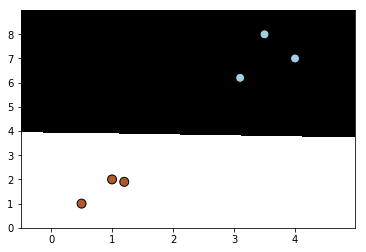

In [3]:
#绘制分类结果图形的函数

def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

In [16]:
# input data
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9]])
y = np.array([0, 0, 0, 1, 1, 1])
# initialize the logistic regression classifier
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
 # train the classifier
logregr.fit(X, y)

In [17]:
 # draw datapoints and boundaries
plot_classifier(logregr, X, y)

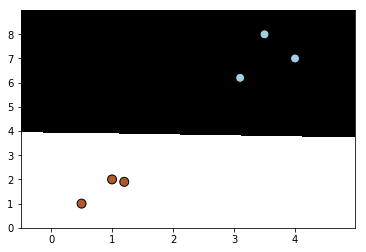

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9]])
y = np.array([0, 0, 0, 1, 1, 1])
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
logregr.fit(X, y)
plot_classifier(logregr, X, y)

#### （2）多类数据分类

Scikit-learn中的LogisticRegression可以实现"一对多"分类或Softmax回归的多类分类。以鸢尾花数据为例，应用LogisticRegression进行多类分类。

Data Set Characteristics:

![](https://ai-studio-static-online.cdn.bcebos.com/e75773b7c55d497b96df7443f5033735936a5f4dcd244dacb4e791590ecd65f8)

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,1:3]
y = iris.target

In [23]:
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
 # train the classifier
logregr.fit(X, y)
logregr.score(X,y)

#### 实验与讨论
* 以平均精度（LogisticRegression.score(X,y)）为指标，比较不同特征组合与数据集划分的分类性能（至少三组）。
* 了解其它分类性能度量指标实现方法（选做）。

In [7]:
from sklearn import datasets
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#先选取不同的划分比例，先取1：10
iris = datasets.load_iris()
X = iris.data
y = iris.target
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)
logregr1 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr1.fit(xtrain, ytrain)
ans = logregr1.score(xtest, ytest)
print('当划分比例为1：10时，得分为{:.2f}'.format(ans))
#取1：20
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.05)
logregr2 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr2.fit(xtrain, ytrain)
ans = logregr2.score(xtest, ytest)
print('当划分比例为1：20时，得分为{:.2f}'.format(ans))
#取1:5
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
logregr3 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr3.fit(xtrain, ytrain)
ans = logregr3.score(xtest, ytest)
print('当划分比例为1：5时，得分为{:.2f}'.format(ans))

#结果取1：5与1：20时效果都不错，下面选取不同特征值，选取比例为1：5
#先选取第1、2个的特征值
X1 = X[:,0:1]
xtrain, xtest, ytrain, ytest = train_test_split(X1, y, test_size = 0.2)
logregr4 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr4.fit(xtrain, ytrain)
ans = logregr4.score(xtest, ytest)
print('当取第1、2个特征时，得分为{:.2f}'.format(ans))
#再选取第1、3个的特征值
X2 = np.c_[X[:,0],X[:,2]]
xtrain, xtest, ytrain, ytest = train_test_split(X2, y, test_size = 0.2)
logregr5 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr5.fit(xtrain, ytrain)
ans = logregr5.score(xtest, ytest)
print('当取第1、3个特征时，得分为{:.2f}'.format(ans))
#最后选取第3、4个的特征值
X2 = X[:,2:3]
xtrain, xtest, ytrain, ytest = train_test_split(X2, y, test_size = 0.2)
logregr6 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr6.fit(xtrain, ytrain)
ans = logregr6.score(xtest, ytest)
print('当取第3、4个特征时，得分为{:.2f}'.format(ans))

当划分比例为1：10时，得分为1.00
当划分比例为1：20时，得分为1.00
当划分比例为1：5时，得分为0.87
当取第1、2个特征时，得分为0.73
当取第1、3个特征时，得分为1.00
当取第3、4个特征时，得分为1.00


### 三、实验结果与分析

（请给出实验内容中“实验与讨论”中的结果及其分析。）

In [66]:
#考虑到第一题最好是使用较好的划分比例这样得出的结果会好一些，所以先做第二题
#讨论第二题：不同划分比例得出的回归性能.三组数据全部使用所有特征值
import numpy as np
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
#划分比例1——test：train = 1：10
Xtrain = diabetes_X[:-40]
Xtest = diabetes_X[-40:]
ytrain = diabetes_y[:-40]
ytest = diabetes_y[-40:]
reg1 = linear_model.LinearRegression()
reg1.fit(Xtrain, ytrain)
ans = reg1.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为10：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
#划分比例2——test：train = 1：5
Xtrain = diabetes_X[:-80]
Xtest = diabetes_X[-80:]
ytrain = diabetes_y[:-80]
ytest = diabetes_y[-80:]
reg2 = linear_model.LinearRegression()
reg2.fit(Xtrain, ytrain)
ans = reg2.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为5：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
#划分比例3——test：train = 1：50
Xtrain = diabetes_X[:-8]
Xtest = diabetes_X[-8:]
ytrain = diabetes_y[:-8]
ytest = diabetes_y[-8:]
reg3 = linear_model.LinearRegression()
reg3.fit(Xtrain, ytrain)
ans = reg3.predict(Xtest)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当比例约为50：1时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))

#实验一：取不同特征值比较其性能
import numpy as np
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
#划分比例1——test：train = 1：10
Xtrain = diabetes_X[:-40]
Xtest = diabetes_X[-40:]
ytrain = diabetes_y[:-40]
ytest = diabetes_y[-40:]
Xtr = np.c_[Xtrain[:,0],Xtrain[:,1],Xtrain[:,2]]
Xte = np.c_[Xtest[:,0],Xtest[:,1],Xtest[:,2]]
reg1 = linear_model.LinearRegression()
reg1.fit(Xtr, ytrain)
ans = reg1.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取前三个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
Xtr = np.c_[Xtrain[:,6],Xtrain[:,7],Xtrain[:,8]]
Xte = np.c_[Xtest[:,6],Xtest[:,7],Xtest[:,8]]
reg2 = linear_model.LinearRegression()
reg2.fit(Xtr, ytrain)
ans = reg2.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取第4、5、6个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))
Xtr = np.c_[Xtrain[:,0],Xtrain[:,1],Xtrain[:,2]]
Xte = np.c_[Xtest[:,0],Xtest[:,1],Xtest[:,2]]
reg = linear_model.LinearRegression()
reg.fit(Xtr, ytrain)
ans = reg.predict(Xte)
mse = 0
summ = 0
lenth = len(ans)
for i in range(lenth):
    summ+=(ans[i]-ytest[i])*(ans[i]-ytest[i])
mse = summ/lenth
yave = 0
for i in ytest:
    yave += i 
yave/=lenth
sumr = 0
for i in range(lenth): 
    sumr+=(ytest[i]-yave)*(ytest[i]-yave)
r = summ/sumr/lenth
print('当选取第7、8、9个特征值时，均方误差为{:.2f}，R方为{:.4f}'.format(mse, 1-r))

当比例约为10：1时，均方误差为1751.06，R方为0.9923
当比例约为5：1时，均方误差为2666.92，R方为0.9945
当比例约为50：1时，均方误差为1328.31，R方为0.9552
当选取前三个特征值时，均方误差为3267.02，R方为0.9857
当选取第4、5、6个特征值时，均方误差为3322.79，R方为0.9855
当选取第7、8、9个特征值时，均方误差为3267.02，R方为0.9857


实验一：
  当比例约为10：1时，均方误差为1751.06，R方为0.9923
  当比例约为5：1时，均方误差为2666.92，R方为0.9945
  当比例约为50：1时，均方误差为1328.31，R方为0.9552
  当选取前三个特征值时，均方误差为3267.02，R方为0.9857
  当选取第4、5、6个特征值时，均方误差为3322.79，R方为0.9855
  当选取第7、8、9个特征值时，均方误差为3267.02，R方为0.9857
  
  根据讨论二结果，我们会发现当取样train：test比例接近10：1时结果最佳
  
  根据对讨论一的观察，我们会发现性别、年龄与后面的体测指标其实误差接近，但都小于10个特征值一起使用的情况（及欠拟合）。这说明每个特征值都对结果产生了影响。
  

In [8]:
from sklearn import datasets
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#先选取不同的划分比例，先取1：10
iris = datasets.load_iris()
X = iris.data
y = iris.target
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)
logregr1 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr1.fit(xtrain, ytrain)
ans = logregr1.score(xtest, ytest)
print('当划分比例为1：10时，得分为{:.2f}'.format(ans))
#取1：20
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.05)
logregr2 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr2.fit(xtrain, ytrain)
ans = logregr2.score(xtest, ytest)
print('当划分比例为1：20时，得分为{:.2f}'.format(ans))
#取1:5
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
logregr3 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr3.fit(xtrain, ytrain)
ans = logregr3.score(xtest, ytest)
print('当划分比例为1：5时，得分为{:.2f}'.format(ans))

#结果取1：5与1：20时效果都不错，下面选取不同特征值，选取比例为1：5
#先选取第1、2个的特征值
X1 = X[:,0:1]
xtrain, xtest, ytrain, ytest = train_test_split(X1, y, test_size = 0.2)
logregr4 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr4.fit(xtrain, ytrain)
ans = logregr4.score(xtest, ytest)
print('当取第1、2个特征时，得分为{:.2f}'.format(ans))
#再选取第1、3个的特征值
X2 = np.c_[X[:,0],X[:,2]]
xtrain, xtest, ytrain, ytest = train_test_split(X2, y, test_size = 0.2)
logregr5 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr5.fit(xtrain, ytrain)
ans = logregr5.score(xtest, ytest)
print('当取第1、3个特征时，得分为{:.2f}'.format(ans))
#最后选取第3、4个的特征值
X2 = X[:,2:3]
xtrain, xtest, ytrain, ytest = train_test_split(X2, y, test_size = 0.2)
logregr6 = linear_model.LogisticRegression(solver='liblinear', C=90)
logregr6.fit(xtrain, ytrain)
ans = logregr6.score(xtest, ytest)
print('当取第3、4个特征时，得分为{:.2f}'.format(ans))

当划分比例为1：10时，得分为0.87
当划分比例为1：20时，得分为1.00
当划分比例为1：5时，得分为1.00
当取第1、2个特征时，得分为0.67
当取第1、3个特征时，得分为0.93
当取第3、4个特征时，得分为0.97


分析：
	当划分比例为1:10 1:5 1:20时效果都很好。于是选择1：5的划分比例
 	
    取特征值时，对于1、3 和3、4个特征值拟合效果比较好，但1、2个特征值拟合效果极差。所以可以推断，第二个特征值其实对该样本的结果相关性很低。

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 